CREDIT CARD FRAUD DETECTION

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('creditcard.csv.zip', lineterminator='\n')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [50]:
print(df.isnull().values.any())

False


In [ ]:
# now we can sepearte fraud and non fraud transactions 
# by giving them 0 and 1

In [56]:
fraud=df[df['Class']==1]
not_fraud=df[df['Class']==0]
print(fraud.shape,not_fraud.shape)

(492, 31) (284315, 31)


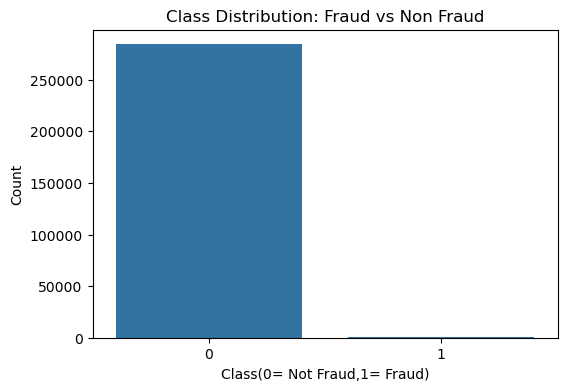

Class
0    284315
1       492
Name: count, dtype: int64


In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Fraud vs Non Fraud')
plt.xlabel('Class(0= Not Fraud,1= Fraud)')
plt.ylabel('Count')
plt.show()

print(df['Class'].value_counts())

<Axes: xlabel='Amount', ylabel='Count'>

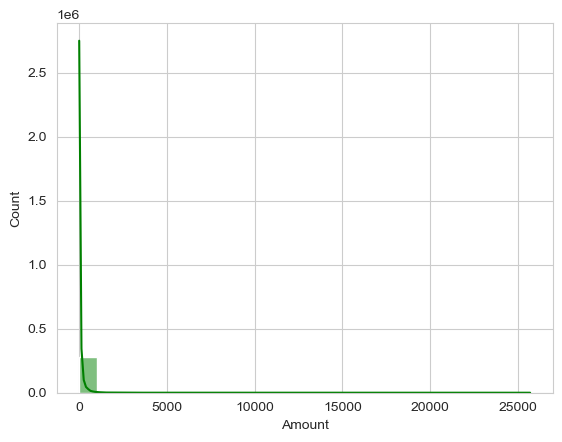

In [58]:
sns.set_style("whitegrid")
sns.histplot(df['Amount'],bins=40, binwidth=1000,color='green',kde='true')

In [ ]:
# here we're not able to find any distribution so for better understanding we
# converted this distribution into log distribution using nplog2 algorithm

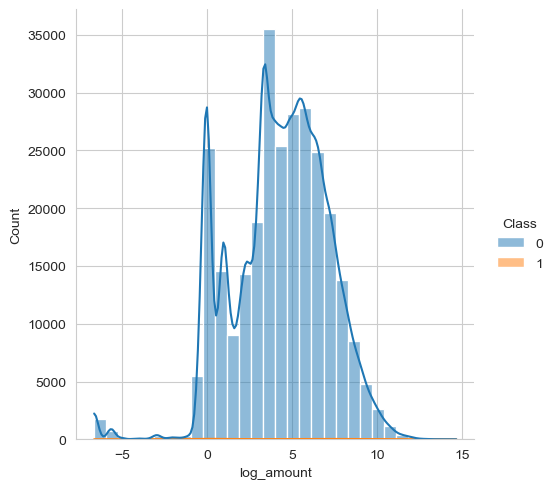

In [60]:
sns.set_style("whitegrid")
df["log_amount"] = np.log2(df["Amount"]+0.01)
#here we added 0.02 cus we dont want to take log2(0) which is undefined
sns.displot(x = "log_amount",bins = 30, kde = True, hue = "Class", data=df)

In [ ]:
# now after observation we can see most values range from 0 to 10

In [62]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

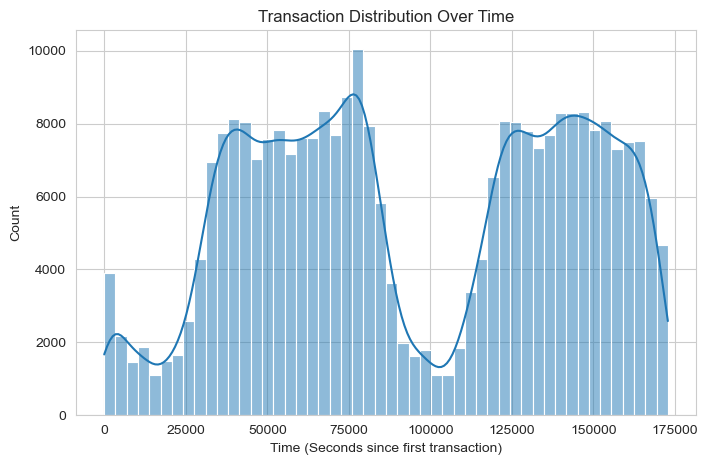

In [64]:
plt.figure(figsize=(8,5))
sns.histplot(df["Time"], bins=50, kde=True)
plt.title("Transaction Distribution Over Time")
plt.xlabel("Time (Seconds since first transaction)")
plt.ylabel("Count")
plt.show()

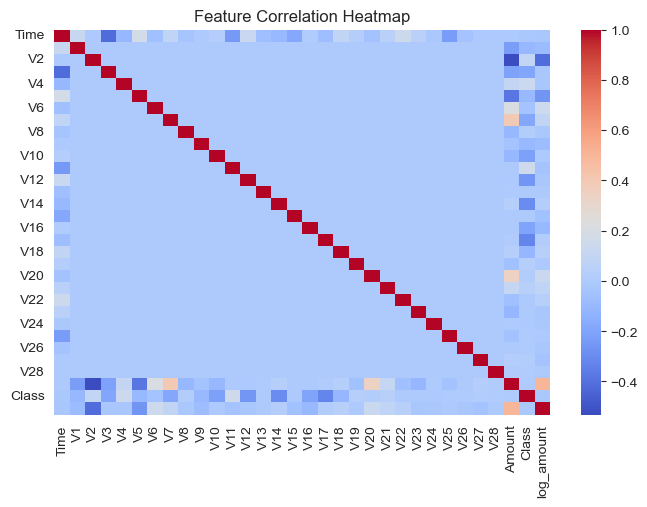

In [66]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# as we can see from our above EDA observations that fraud cases are in very rare amount
# 284315:492 which can lead to imbalances in the dataset

In [ ]:
!pip install imbalanced-learn

In [ ]:
#here we are using smote 
#so what does smote do
#SMOTE(Synthetic Minority Over-sampling Technique) is used t
#to balance an imbalanced dataset by generating synthetic samples for 
#the minority class(which are less in size)


In [9]:
#here ive taken the help of chatgpt for understanding SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(columns=["Class"])  
y = df["Class"]  

smote = SMOTE(sampling_strategy=0.5, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original Class Distribution:\n", y.value_counts())
print("New Class Distribution After SMOTE:\n", y_resampled.value_counts())


Original Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
New Class Distribution After SMOTE:
 Class
0    284315
1    142157
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled[["Amount", "Time"]] = scaler.fit_transform(X_resampled[["Amount", "Time"]])
print("Feature scaling applied successfully!")
print('Scaler Mean:\n',scaler.mean_)#a good practice to take out the mean


Feature scaling applied successfully!
Scaler Mean:
 [   92.99113525 90130.47757324]


In [13]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

#for good reliabilty here i'm using Kfold crossv score 
kf= KFold(n_splits=5,shuffle=True,random_state=42)
models={
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
cv_results={}

for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring="accuracy")
    cv_results[name] = scores.mean()  # Store mean accuracy for comparison
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}")

    


Decision Tree - Mean Accuracy: 0.9978
Random Forest - Mean Accuracy: 0.9998


In [30]:
df1 = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],  
    'Mean Accuracy': [cv_results['Decision Tree'], cv_results['Random Forest']]
})
print(df1)



           Model  Mean Accuracy
0  Decision Tree       0.997824
1  Random Forest       0.999838


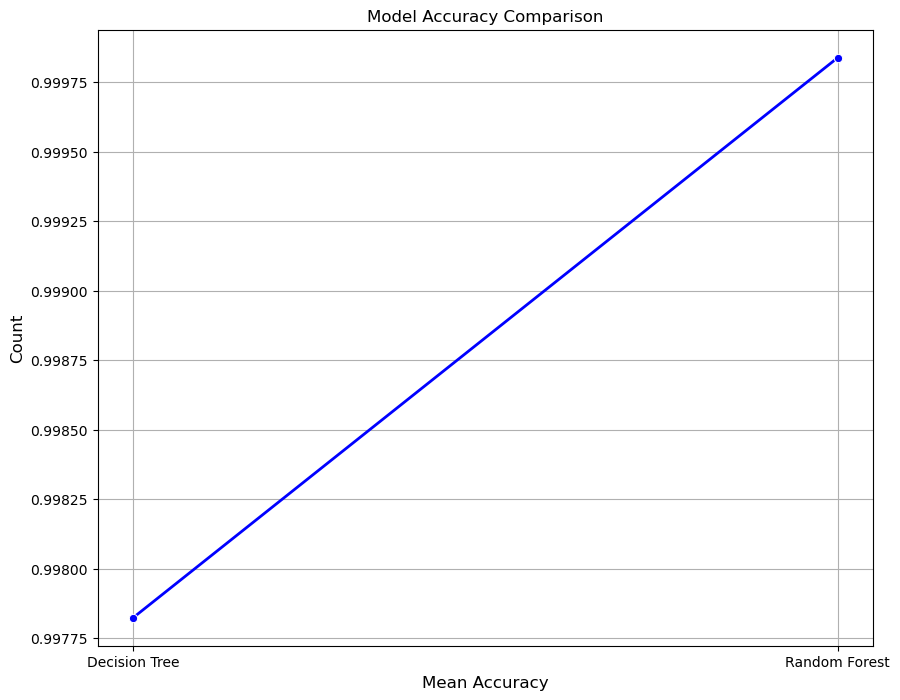

In [44]:
plt.figure(figsize = (10,8))
sns.lineplot(x='Model', y='Mean Accuracy', data=df1, marker='o', color='b', linewidth=2)
plt.title("Model Accuracy Comparison",fontsize=12)
plt.xlabel("Mean Accuracy",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.grid(True)
plt.show()